<a href="https://colab.research.google.com/github/jaynarayan94/All-ML-Code-And-Mini-Projects/blob/master/ML_Workflow_on_Diabetes_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

np.random.seed(123)

In [4]:
from google.colab import files

uploaded = files.upload()


Saving diabetes.csv to diabetes.csv


In [0]:
import io

diabetes = pd.read_csv(io.StringIO(uploaded['diabetes.csv'].decode('utf-8')))

In [6]:
diabetes.head()

,Pregnancies,Glucose,BP,Skin Thickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
print(diabetes.columns)

print()

print(diabetes.shape)

Index(['Pregnancies', 'Glucose', 'BP', 'Skin Thickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Class'],
      dtype='object')

(768, 9)


In [10]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BP                          768 non-null int64
Skin Thickness              768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Class                       768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [11]:
diabetes.describe()

,Pregnancies,Glucose,BP,Skin Thickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [12]:
# let's check for the missing NUll vales

(diabetes.isnull().sum()/diabetes.shape[0])*100

Pregnancies                 0.0
Glucose                     0.0
BP                          0.0
Skin Thickness              0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Class                       0.0
dtype: float64

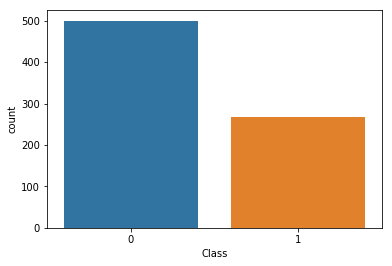

In [43]:
sns.countplot(diabetes['Class']);

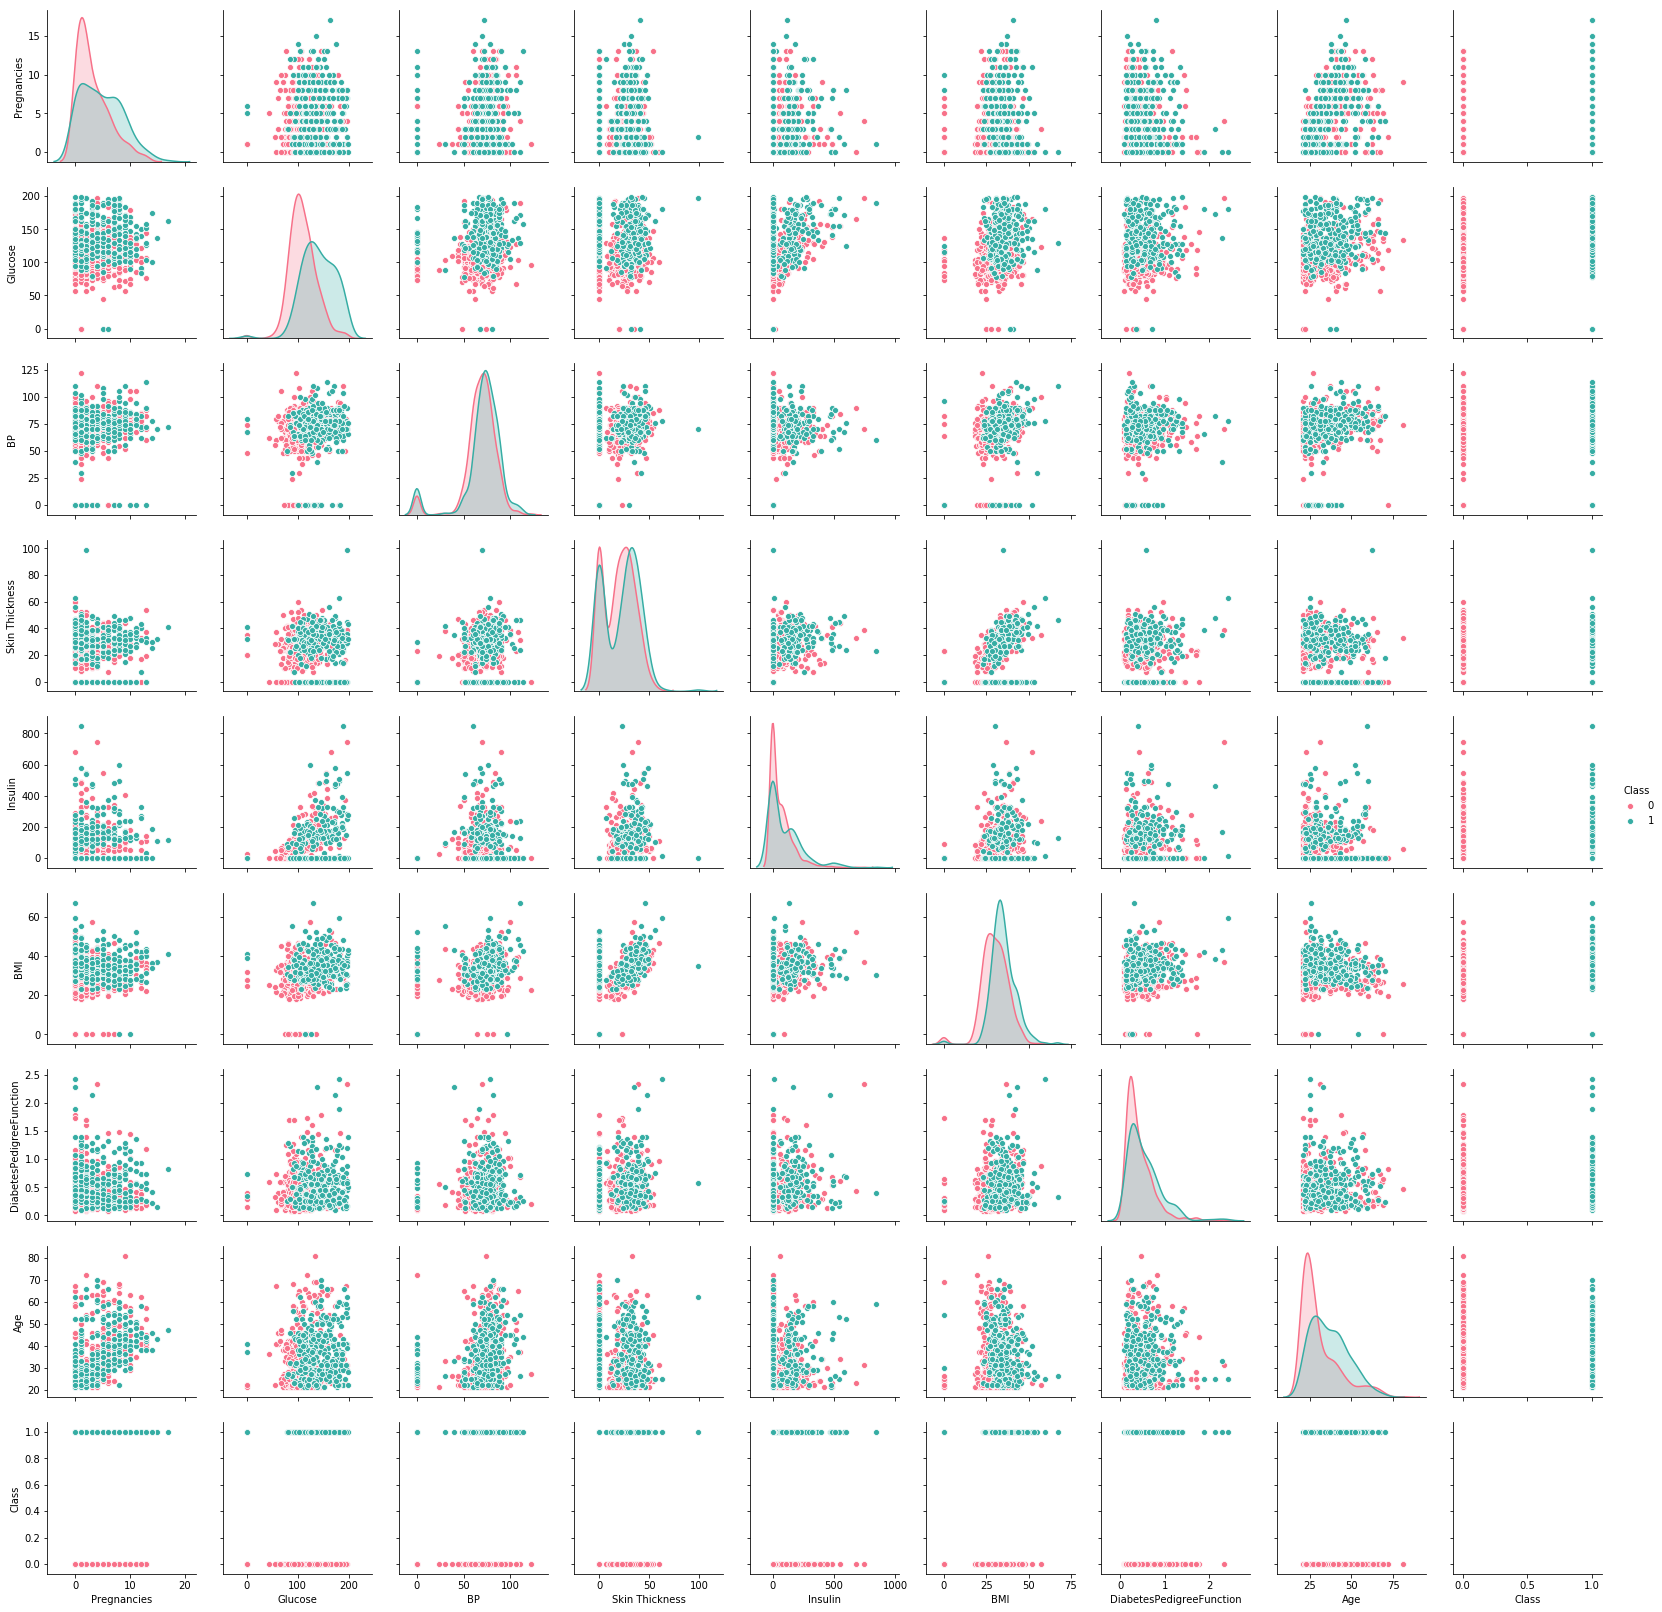

In [22]:
sns.pairplot(diabetes,hue='Class',palette="husl")
plt.show();

### Unexpected Outliers
* When analyzing the histogram we can identify that there are some outliers in some columns. We will further analyse those outliers and determine what we can do about them.

### Blood pressure :
By observing the data we can see that there are 0 values for blood pressure. And it is evident that the readings of the data set seems wrong because a living person cannot have diastolic blood pressure of zero. By observing the data we can see 35 counts where the value is 0.

In [25]:
print("Total : ", diabetes[diabetes.BP == 0].shape[0])

print(diabetes[diabetes.BP == 0].groupby('Class')['Age'].count())

Total :  35
Class
0    19
1    16
Name: Age, dtype: int64


### Plasma glucose levels :
Even after fasting glucose level would not be as low as zero. Therefor zero is an invalid reading. By observing the data we can see 5 counts where the value is 0.

In [26]:
print("Total : ", diabetes[diabetes.Glucose == 0].shape[0])

print(diabetes[diabetes.Glucose == 0].groupby('Class')['Age'].count())

Total :  5
Class
0    3
1    2
Name: Age, dtype: int64


### Skin Fold Thickness : 
For normal people skin fold thickness can’t be less than 10 mm better yet zero. Total count where value is 0 : 227.

In [28]:
print("Total : ", diabetes[diabetes['Skin Thickness'] == 0].shape[0])

print(diabetes[diabetes['Skin Thickness'] == 0].groupby('Class')['Age'].count())

Total :  227
Class
0    139
1     88
Name: Age, dtype: int64


### BMI : 
Should not be 0 or close to zero unless the person is really underweight which could be life threatening.

In [30]:
print("Total : ", diabetes[diabetes.BMI == 0].shape[0])

print(diabetes[diabetes.BMI == 0].groupby('Class')['Age'].count())

Total :  11
Class
0    9
1    2
Name: Age, dtype: int64


### Insulin : 
In a rare situation a person can have zero insulin but by observing the data, we can find that there is a total of 374 counts.

In [31]:
print("Total : ", diabetes[diabetes.Insulin == 0].shape[0])

print(diabetes[diabetes.Insulin == 0].groupby('Class')['Age'].count())

Total :  374
Class
0    236
1    138
Name: Age, dtype: int64


#### Here are several ways to handle invalid data values :
1. Ignore/remove these cases : This is not actually possible in most cases because that would mean losing valuable information. And in this case “skin thickness” and “insulin” columns means have a lot of invalid points. But it might work for “BMI”, “glucose ”and “blood pressure” data points.

2. Put average/mean values : This might work for some data sets, but in our case putting a mean value to the blood pressure column would send a wrong signal to the model.

3. Avoid using features : It is possible to not use the features with a lot of invalid values for the model. This may work for “skin thickness” but its hard to predict that.

By the end of the data cleaning process we have come to the conclusion that this given data set is incomplete. Since this is a demonstration for machine learning we will proceed with the given data with some minor adjustments.

We will remove the rows which the “BloodPressure”, “BMI” and “Glucose” are zero.

In [32]:
diabetes_mod = diabetes[(diabetes.BP!=0) & (diabetes.BMI!=0) & (diabetes.Glucose!=0)]

print(diabetes_mod.shape)

(724, 9)


## Feature Engineering

“ Feature engineering enables to highlight the important features and facilitate to bring domain expertise on the problem to the table. It also allows to avoid overfitting the model despite providing many input features”.

In [34]:
from sklearn.model_selection import train_test_split

X = diabetes_mod.drop(['Class'],axis=1)
y = diabetes_mod['Class']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,stratify=y,random_state=123)

print(X_train.shape,X_test.shape)
print()
print(y_train.shape,y_test.shape)

(579, 8) (145, 8)

(579,) (145,)


We import 7 classifiers namely K-Nearest Neighbors, Support Vector Classifier, Logistic Regression, Gaussian Naive Bayes, Random Forest and Gradient Boost to be contenders for the best classifier.

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVC', SVC()))
models.append(('Log_Reg', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))

In [41]:
names = []
scores = []
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)
    
    
tr_split = pd.DataFrame({'Name': names, 'Score': scores})

print(tr_split.sort_values(by = 'Score',ascending=False))

      Name     Score
6       GB  0.806897
4      GNB  0.793103
2  Log_Reg  0.779310
5       RF  0.751724
3       DT  0.703448
0      KNN  0.696552
1      SVC  0.655172


## K-Fold Cross Validation with Scikit Learn :

In [46]:
from sklearn.model_selection import StratifiedKFold
names = []
scores = []
for name, model in models:
    
    kfold = StratifiedKFold(n_splits=10, random_state=10) 
    score = cross_val_score(model, X, y, cv=kfold, scoring='accuracy').mean()
    
    names.append(name)
    
    scores.append(score)
kf_cross_val = pd.DataFrame({'Name': names, 'Score': scores})

print(kf_cross_val.sort_values(by = 'Score',ascending=False))

      Name     Score
2  Log_Reg  0.776440
6       GB  0.764072
4      GNB  0.755681
5       RF  0.739281
0      KNN  0.711521
3       DT  0.675867
1      SVC  0.656075


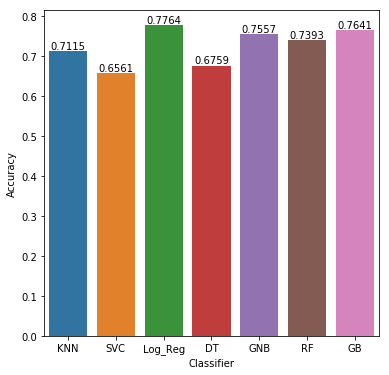

In [49]:
plt.figure(figsize=(6,6))
axis = sns.barplot(x = 'Name', y = 'Score', data = kf_cross_val)
axis.set(xlabel='Classifier', ylabel='Accuracy')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()

## Gradient Boosting — Feature Selection

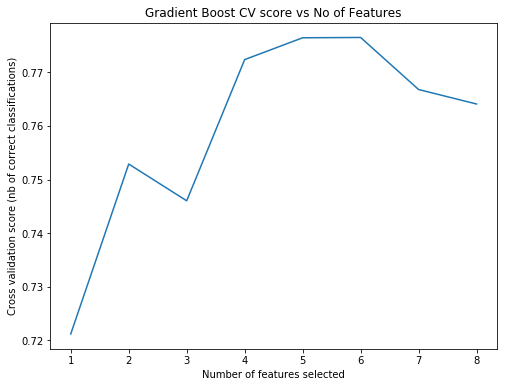

In [56]:
from sklearn.feature_selection import RFECV

gb_model = GradientBoostingClassifier()
gb_rfecv = RFECV(estimator=gb_model, step=1, cv=10, scoring='accuracy')
gb_rfecv.fit(X, y)
plt.figure(figsize=(8,6))
plt.title('Gradient Boost CV score vs No of Features')
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(gb_rfecv.grid_scores_) + 1), gb_rfecv.grid_scores_)
plt.show()


In [58]:
feature_importance = list(zip(diabetes.columns, gb_rfecv.support_))
new_features = []
for key,value in enumerate(feature_importance):
    if(value[1]) == True:
        new_features.append(value[0])
        
print(new_features)

['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


In [59]:
X_new_gb = diabetes_mod[new_features]
initial_score = cross_val_score(gb_model, X, y, cv=5, scoring='accuracy').mean()
print("Initial accuracy : {} ".format(initial_score))
fe_score = cross_val_score(gb_model, X_new_gb, y, cv=5, scoring='accuracy').mean()
print("Accuracy after Feature Selection : {} ".format(fe_score))

Initial accuracy : 0.7624137931034483 
Accuracy after Feature Selection : 0.7762356321839081 


## Model Parameter Tuning

In [62]:
from sklearn.model_selection import GridSearchCV

# Calculate accuracy scores 
X_new = diabetes_mod[new_features]

# Specify parameters
c_values = list(np.arange(1, 10))
param_grid = [
    {'C': c_values, 'penalty': ['l1'], 'solver' : ['liblinear'], 'multi_class' : ['ovr']},
    {'C': c_values, 'penalty': ['l2'], 'solver' : ['liblinear', 'newton-cg', 'lbfgs'], 'multi_class' : ['ovr']}
]

grid = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')
grid.fit(X_new, y)

print(grid.best_params_)
print(grid.best_estimator_)

{'C': 1, 'multi_class': 'ovr', 'penalty': 'l2', 'solver': 'liblinear'}
LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)


In [64]:
logreg_new = LogisticRegression(C=1, multi_class='ovr', penalty='l2', solver='liblinear')

initial_score = cross_val_score(logreg_new, X_new, y, cv=5, scoring='accuracy').mean()

print("Final accuracy : {} ".format(initial_score))

Final accuracy : 0.7790229885057471 


### We manage to achieve a classification accuracy of 77.90% which we can say is quite good.